In [1]:
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from keras.models import Model
from random import randint
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
from keras.layers import Dense, Conv2D, Input, MaxPool2D

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train= pd.read_csv("fashion-mnist_train.csv")

In [5]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
xtr= train.drop(labels="label", axis=1)

In [7]:
xtr= xtr.values

In [8]:
xtr= xtr/255

In [9]:
ytr= train["label"].values

In [10]:
ytr.shape

(60000,)

In [11]:
xtr,valx, ytr,valy= train_test_split(xtr,ytr, test_size=0.2)

In [12]:
xtr.shape

(48000, 784)

In [13]:
valx.shape

(12000, 784)

In [14]:
valy.shape

(12000,)

In [15]:
ytr.shape

(48000,)

In [16]:
xtr= xtr.reshape(-1,784)

In [17]:
xtr.shape

(48000, 784)

In [18]:
valx= valx.reshape(-1,784)

In [19]:
valx.shape

(12000, 784)

**Autoencoder**

In [20]:
input_layer= Input(shape=(784,))

In [21]:
enl1= Dense(units=1500, activation="relu")(input_layer)
enl2= Dense(units=1000, activation="relu")(enl1)
enl3= Dense(units=500, activation= "relu")(enl2)
latentv= Dense(units=10, activation="sigmoid")(enl3)

dec1= Dense(units=500, activation="relu")(latentv)
dec2= Dense(units=1000, activation="relu")(dec1)
dec3= Dense(units=1500, activation="relu")(dec2)

out= Dense(units=784)(dec3)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [22]:
model= Model(input_layer, out)

In [23]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1500)              1177500   
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1501000   
_________________________________________________________________
dense_3 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5010      
_________________________________________________________________
dense_5 (Dense)              (None, 500)               5500      
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              5010

In [24]:
early_stop= EarlyStopping(patience=10, verbose=1)

In [25]:
model.compile(optimizer='adam', loss='mse')

In [28]:
model.fit(xtr,xtr, batch_size=2048, epochs=20, validation_data=(valx,valx), callbacks=[early_stop])


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s 115us/step - loss: 0.0962 - val_loss: 0.0686
Epoch 2/20
48000/48000 [==============================] - 5s 113us/step - loss: 0.0642 - val_loss: 0.0573
Epoch 3/20
48000/48000 [==============================] - 5s 111us/step - loss: 0.0505 - val_loss: 0.0435
Epoch 4/20
48000/48000 [==============================] - 5s 110us/step - loss: 0.0411 - val_loss: 0.0382
Epoch 5/20
48000/48000 [==============================] - 5s 114us/step - loss: 0.0368 - val_loss: 0.0349
Epoch 6/20
48000/48000 [==============================] - 5s 111us/step - loss: 0.0350 - val_loss: 0.0315
Epoch 7/20
48000/48000 [==============================] - 5s 110us/step - loss: 0.0301 - val_loss: 0.0285
Epoch 8/20
48000/48000 [==============================] - 5s 110us/step - loss: 0.0281 - val_loss: 0.0263
Epoch 9/20
48000/48000 [==============================] - 5s 109us/step - loss: 0.0255 - val_loss: 0.

In [29]:
pred= model.predict(valx)

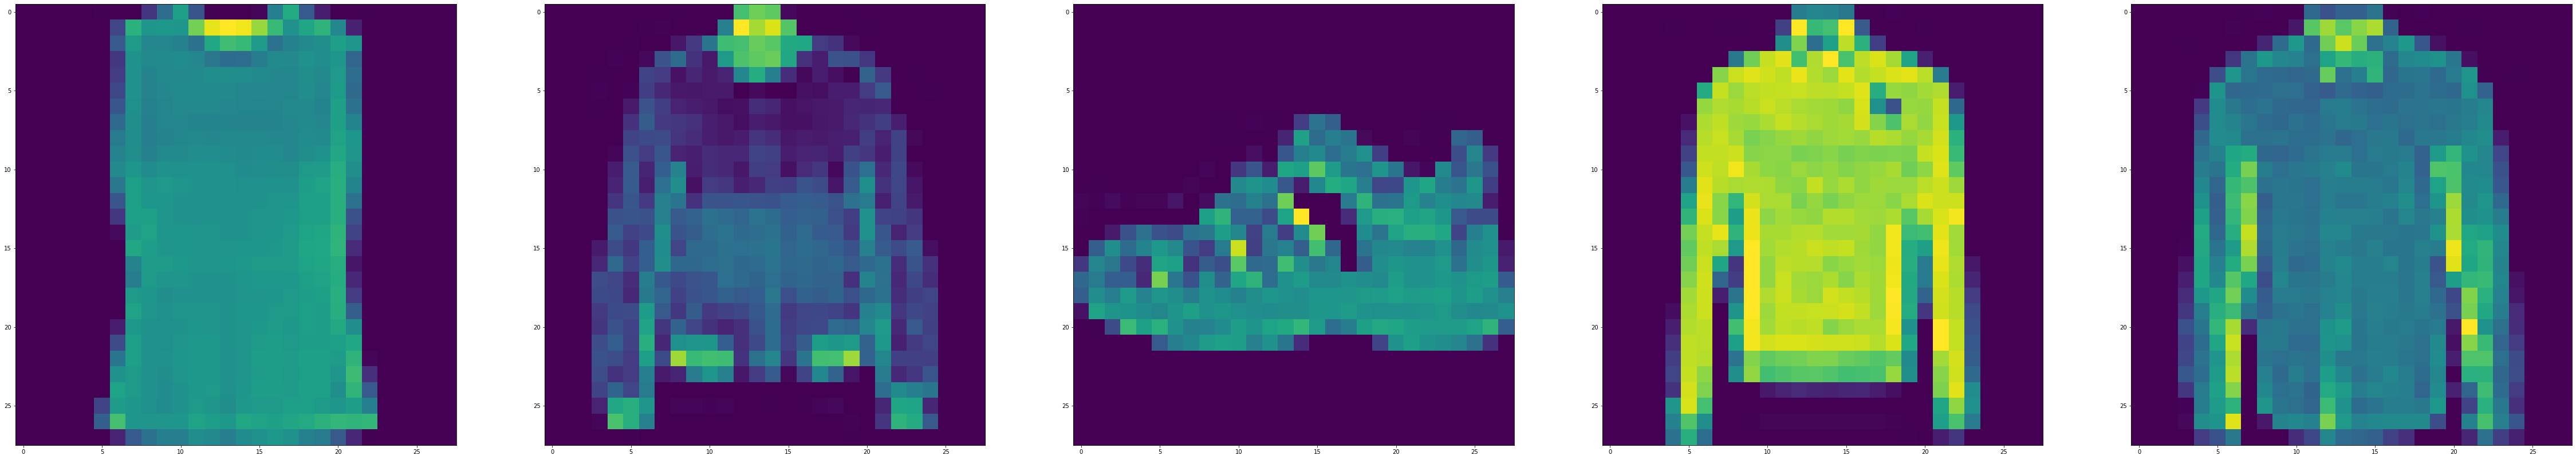

In [31]:
from PIL import Image 
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(valx[i].reshape(28, 28))
plt.show()

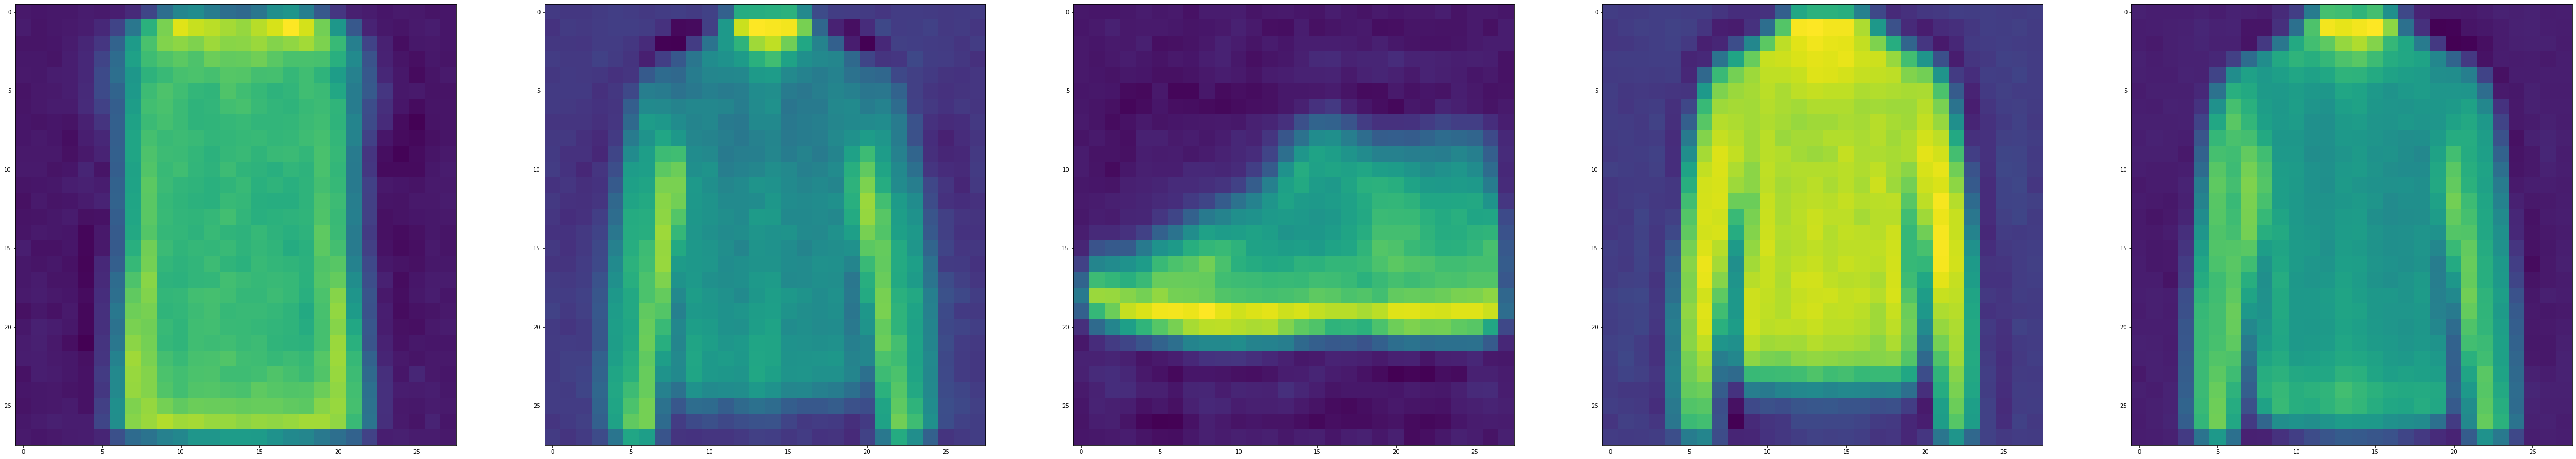

In [32]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(pred[i].reshape(28, 28))
plt.show()